In [ ]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

: 

In [ ]:
#X_train_file = open('../data/serialized/X_train_channels.pkl', 'rb')
#y_train_file = open('../data/serialized/y_train_channels.pkl', 'rb')
#X_val_file = open('../data/serialized/X_val_channels.pkl', 'rb')
#y_val_file = open('../data/serialized/y_val_channels.pkl', 'rb')
X_test_file = open('../data/serialized/X_test_channels.pkl', 'rb')
y_test_file = open('../data/serialized/y_test_channels.pkl', 'rb')

#X_train = pickle.load(X_train_file)
#y_train = pickle.load(y_train_file)
#X_val = pickle.load(X_val_file)
#y_val = pickle.load(y_val_file)
X_test = pickle.load(X_test_file)
y_test = pickle.load(y_test_file)

#X_train_file.close()
#y_train_file.close()
#X_val_file.close()
#y_val_file.close()
X_test_file.close()
y_test_file.close()

In [100]:
X_test = 1 - X_test

In [101]:
def plot_base_prob_bars(suptitle, probs_list, palette, centercolor, filename, save_format):
    
    n_subplots = len(probs_list)
    
    sns.set(rc={'figure.figsize':(25,2.5*n_subplots)})

    # Structure
    fig, axes = plt.subplots(n_subplots, 1)
    fig.suptitle(suptitle, fontsize='xx-large')
    
    #fig.subplots_adjust(top=0.95)
    
    ax_idx = 0
    for subtitle, probs in probs_list:
        # Palette
        pal = sns.color_palette(palette, len(probs))
        rank = probs.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
        # Plot
        axes[ax_idx].set_title(subtitle, fontsize=20)
        #axes[ax_idx].set_title(str(random_100_pos_seqs[ax_idx]))
        
        sns.barplot(ax=axes[ax_idx], x=np.arange(probs.shape[0]), y=probs, palette=np.array(pal[::1])[rank])
        #axes[ax_idx].set(ylim=(0, 0.15))
        #axes[ax_idx].xaxis.tick_top()
        #axes[ax_idx].set(xticks=[100], xticklabels=['TSS']);
        
        axes[ax_idx].set(xticklabels=[]);
        axes[ax_idx].yaxis.set_tick_params(labelsize=15)
        
        #axes[ax_idx].axvline(x=100-0.5, color=centerline)
        #axes[ax_idx].axvline(x=100+0.5, color=centerline)
        axes[ax_idx].plot([100], [probs.max()+0.03], marker='v', markersize=35, color=centercolor)
        ax_idx += 1
    
    fig.savefig(filename, format=save_format)

# Positive sequences

In [102]:
temps = [308.0, 308.3, 308.6, 308.9, 309.2, 309.5, 309.8, 310, 310.1, 310.4, 310.7, 311.0, 311.3, 
         311.6, 311.9, 312.2, 312.5, 312.8, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360]

prob_types = ["OPN", "BUB8", "BUB10", "BUB12", "VRNORM"]

In [103]:
random_100_pos_seqs = np.random.choice(range(2300, 2500), 200, replace=False)

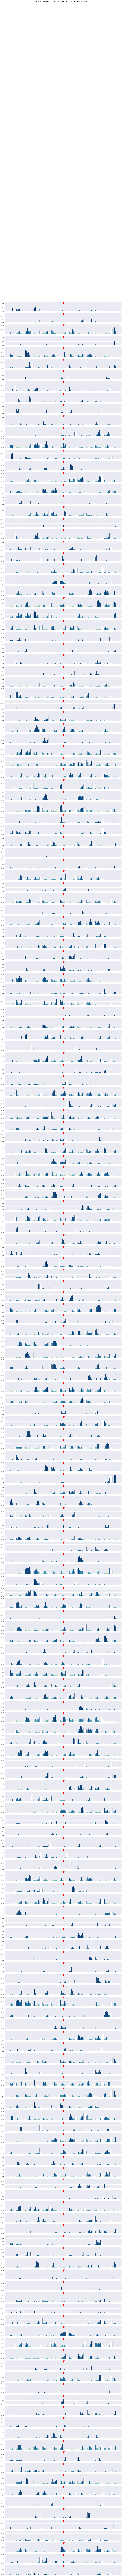

In [104]:
# 100 seqs OPN pos
probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('OPN')]) for seqidx in random_100_pos_seqs]

plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'GnBu', 'red', 'OPNprobs-100randomPOSeqs-at309d8K.png', 'png')
#plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-100randomPOSeqs-at309d8K.pdf', 'pdf')

In [105]:
# 100 seqs BUB8 pos
#probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('BUB8')]) for seqidx in random_100_pos_seqs]

#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'GnBu', 'red', 'BUB8probs-100randomPOSeqs-at309d8K.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'GnBu', 'red', 'BUB8probs-100randomPOSeqs-at309d8K.pdf', 'pdf')

In [106]:
#selected_seqs = [618, 317, 895, 579, 4]
selected_seqs = [916, 1105, 1463, 1355, 1611]

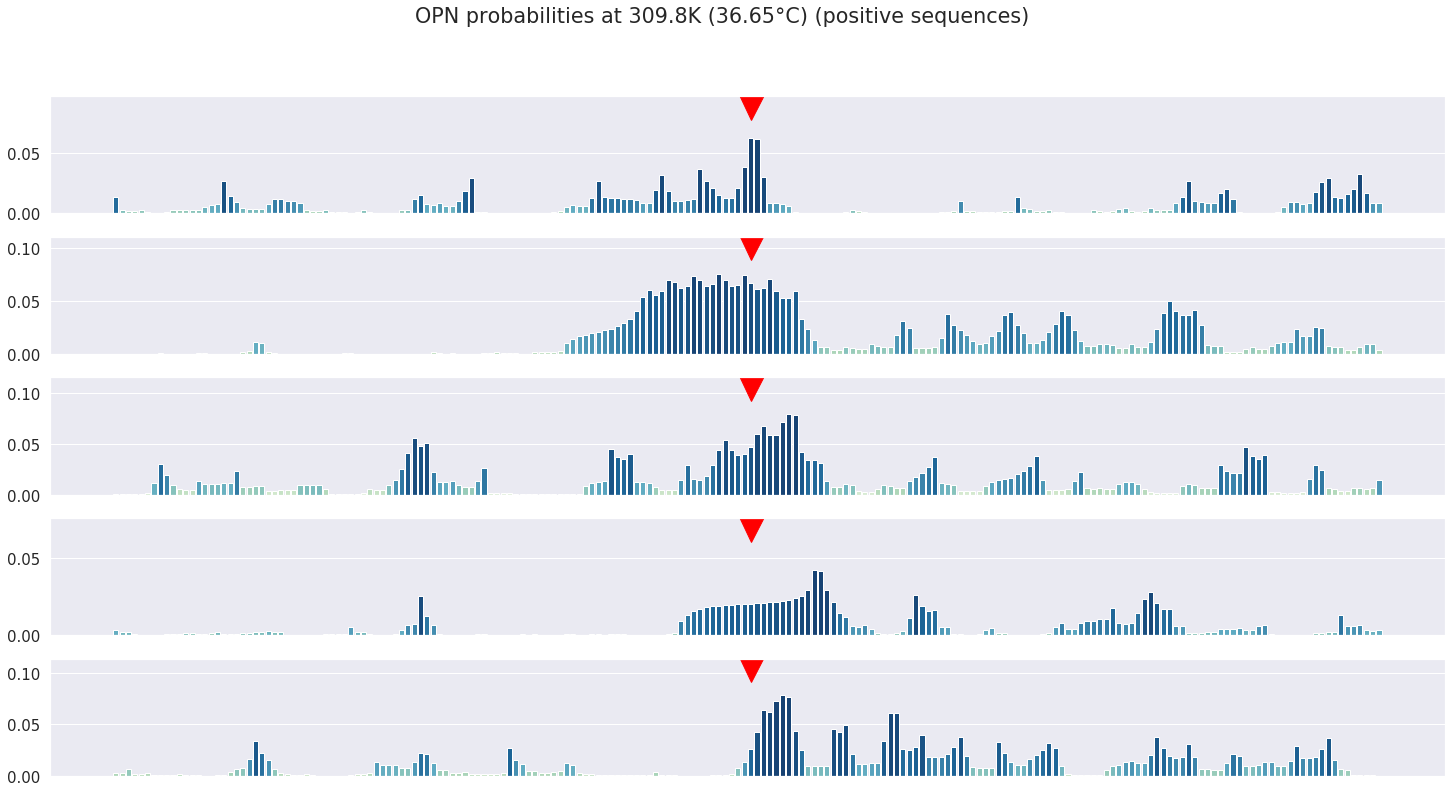

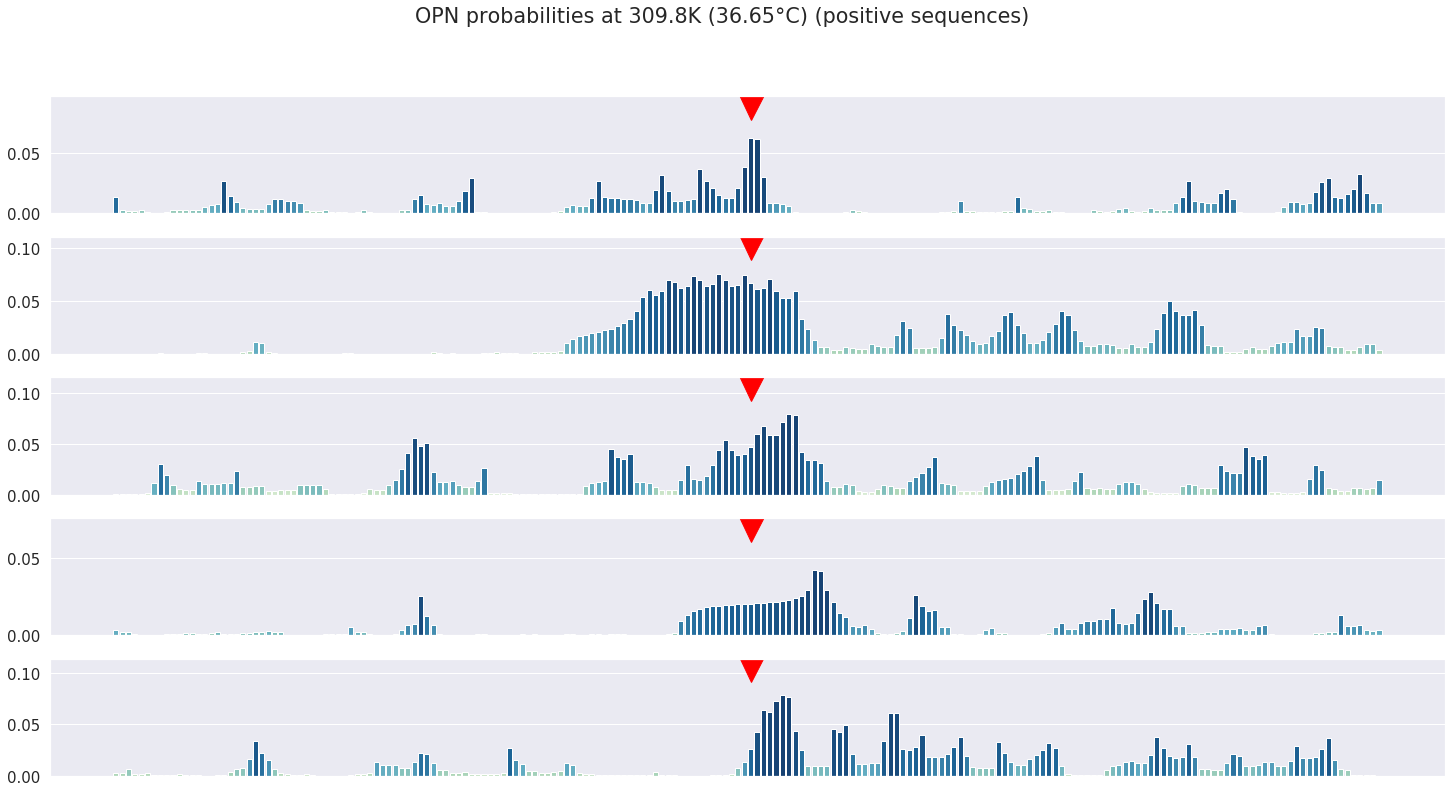

In [107]:
# 5 seqs OPN pos
probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('OPN')]) for seqidx in selected_seqs]
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'GnBu', 'red', 'OPNprobs-5handpickedPOSeqs-at309d8K.png', 'png')
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (positive sequences) ', probs_list, 'GnBu', 'red', 'OPNprobs-5handpickedPOSeqs-at309d8K.pdf', 'pdf')

Probabilidades OPN de 5 secuencias distintas a 309.8K (36.65°C).

In [108]:
# 5 seqs BUB8 pos
#probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('BUB8')]) for seqidx in selected_seqs]
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (positive sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5handpickedPOSseqs-at309d8.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (positive sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5handpickedPOSseqs-at309d8.pdf', 'pdf')

Probabilidades BUB8 de las 5 secuencias anteriores a 309.8K (36.65°C).

In [109]:
selected_temps = [308.0, 308.9, 309.8, 312.5, 320]

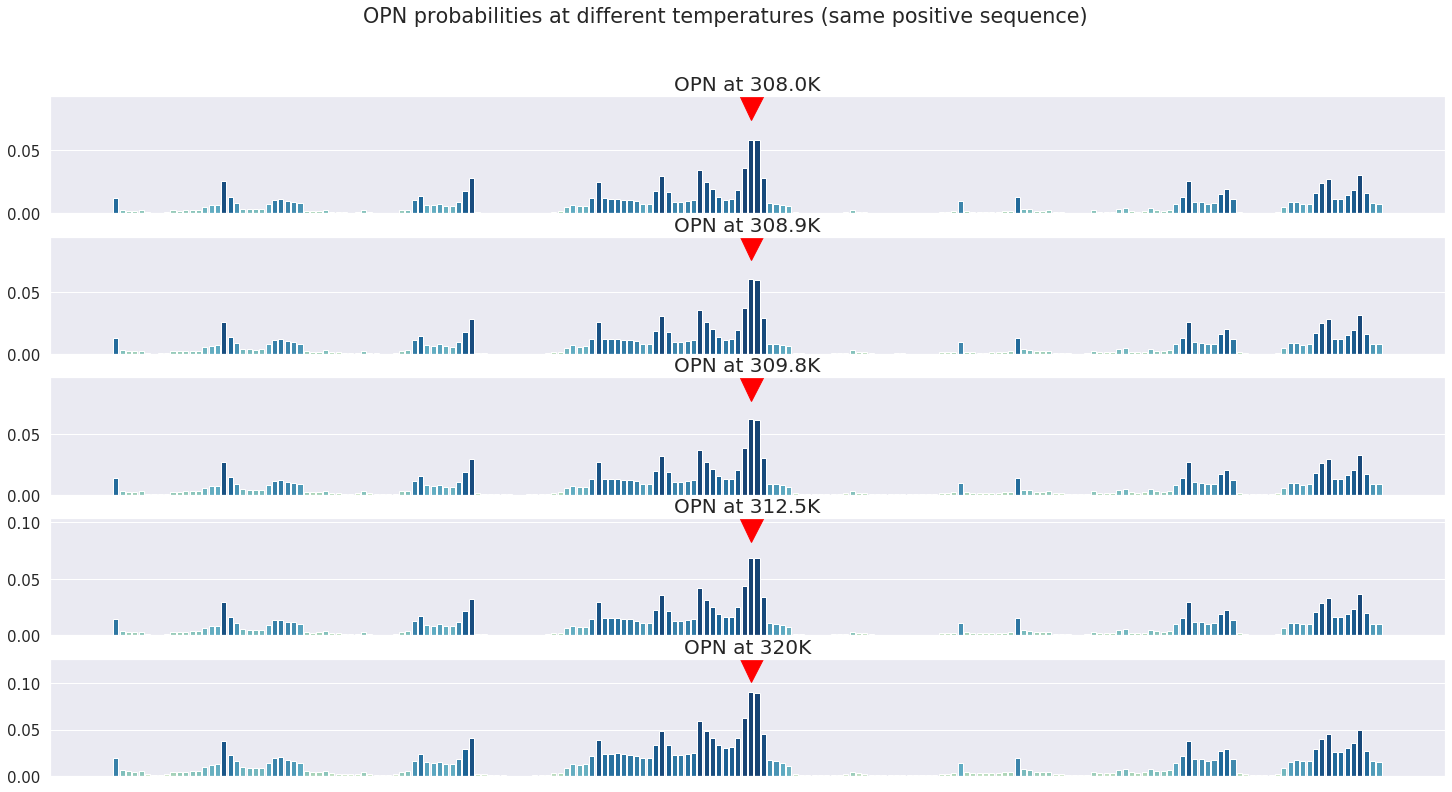

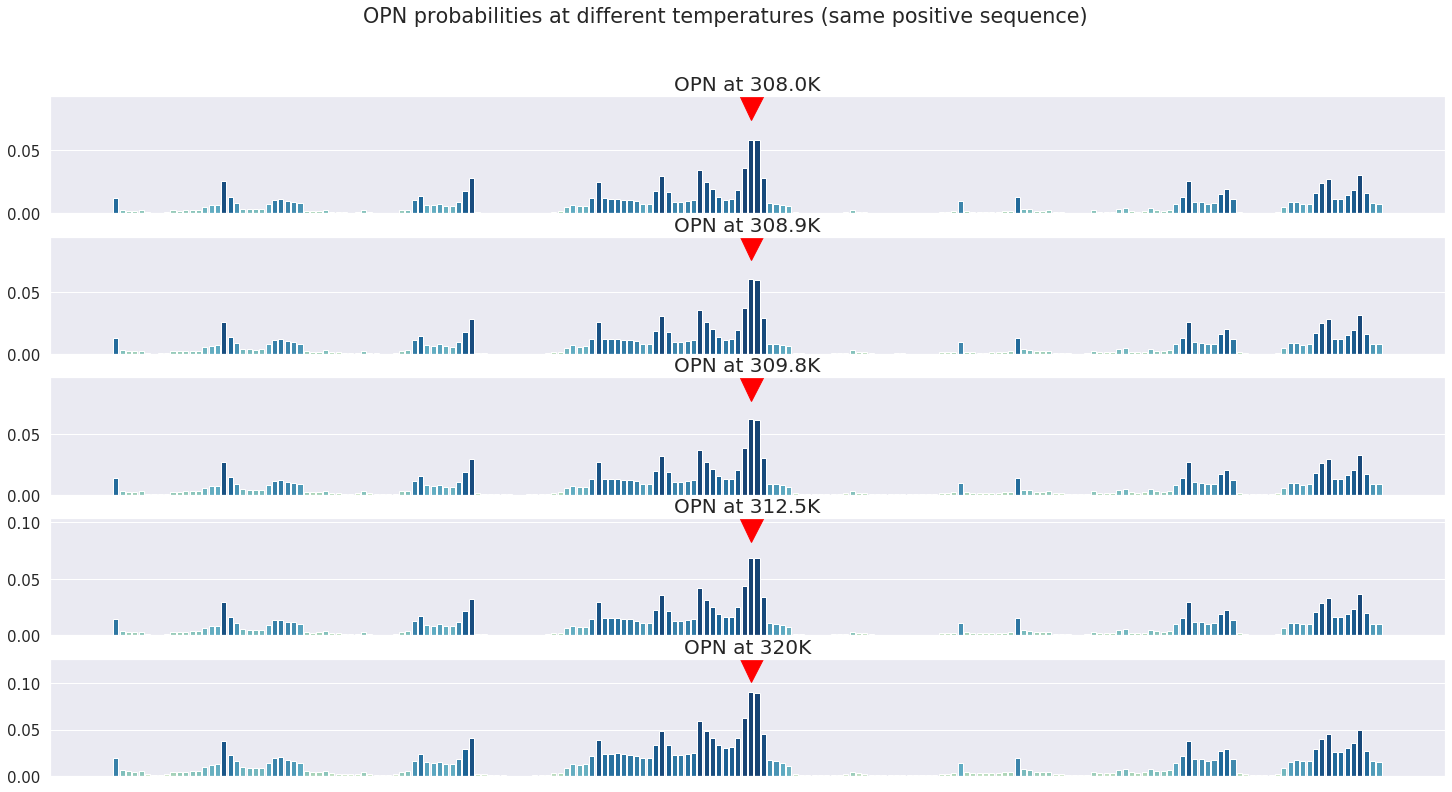

In [110]:
# 5 temps OPN pos
probs_list = [('OPN at '+str(temp)+'K', X_test[selected_seqs[0], temps.index(temp), :, prob_types.index('OPN')]) for temp in selected_temps]
plot_base_prob_bars('OPN probabilities at different temperatures (same positive sequence)', probs_list, 'GnBu', 'red', 'OPNprobs-samePOSseq-atdifferenttemps.png', 'png')
plot_base_prob_bars('OPN probabilities at different temperatures (same positive sequence)', probs_list, 'GnBu', 'red', 'OPNprobs-samePOSseq-atdifferenttemps.pdf', 'pdf')

Probabilidades OPN de la misma secuencia a diferentes temperaturas (pongo saltos grandes de temperatura para que los cambios sean algo más detectables).

In [111]:
# 5 temps BUB8 pos
#probs_list = [('BUB8 at '+str(temp)+'K', X_test[selected_seqs[0], temps.index(temp), :, prob_types.index('BUB8')]) for temp in selected_temps]
#plot_base_prob_bars('BUB8 probabilities at different temperatures (same positive sequence)', probs_list, 'GnBu', 'red', 'BUB8probs-samePOSseq-atdifferenttemps.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at different temperatures (same positive sequence)', probs_list, 'GnBu', 'red', 'BUB8probs-samePOSseq-atdifferenttemps.pdf', 'pdf')

Probabilidades OPN de la misma secuencia a diferentes temperaturas.

-----------------------------------------------------------

# Negative sequences

In [112]:
random_100_neg_seqs = np.random.randint(-1000,0,100)

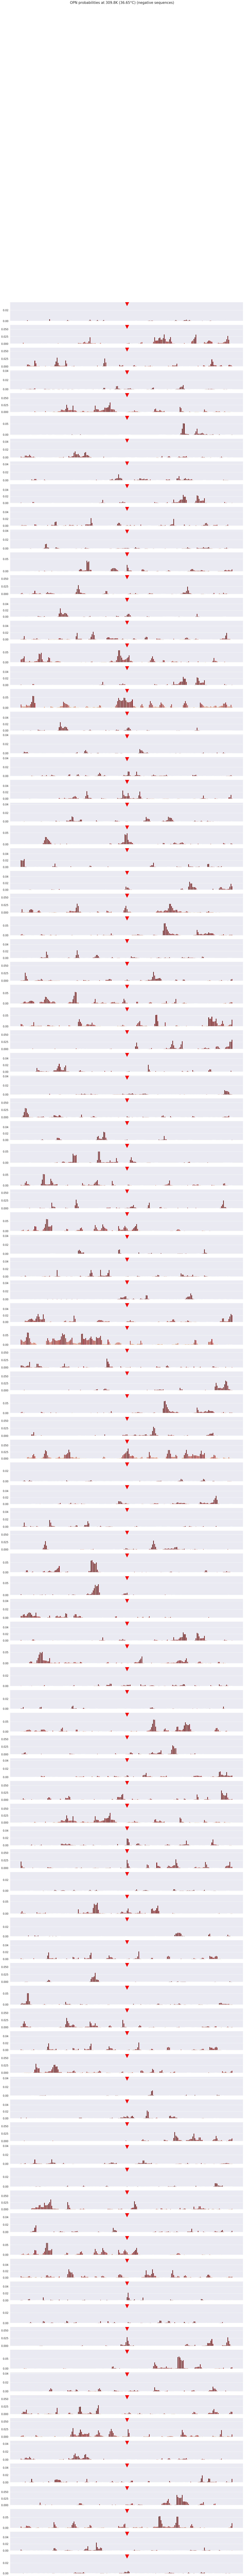

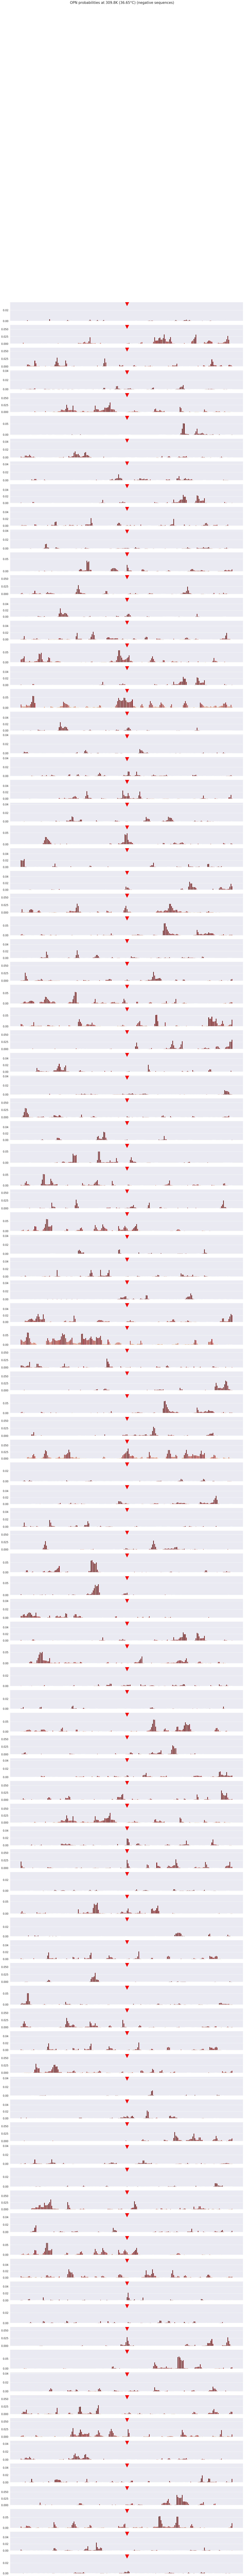

In [113]:
# 100 seqs OPN neg
probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('OPN')]) for seqidx in random_100_neg_seqs]
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-100randomNEGseqs-at309d8K.png', 'png')
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-100randomNEGseqs-at309d8K.pdf', 'pdf');

In [114]:
# 100 seqs BUB8 neg
#probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('BUB8')]) for seqidx in random_100_neg_seqs]
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'GnBu', 'red', 'BUB8probs-100randomNEGseqs-at309d8K.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'GnBu', 'red', 'BUB8probs-100randomNEGseqs-at309d8K.pdf', 'pdf');

In [115]:
selected_seqs = random_selected_neg_seqs = np.random.randint(-100, 0, 5)

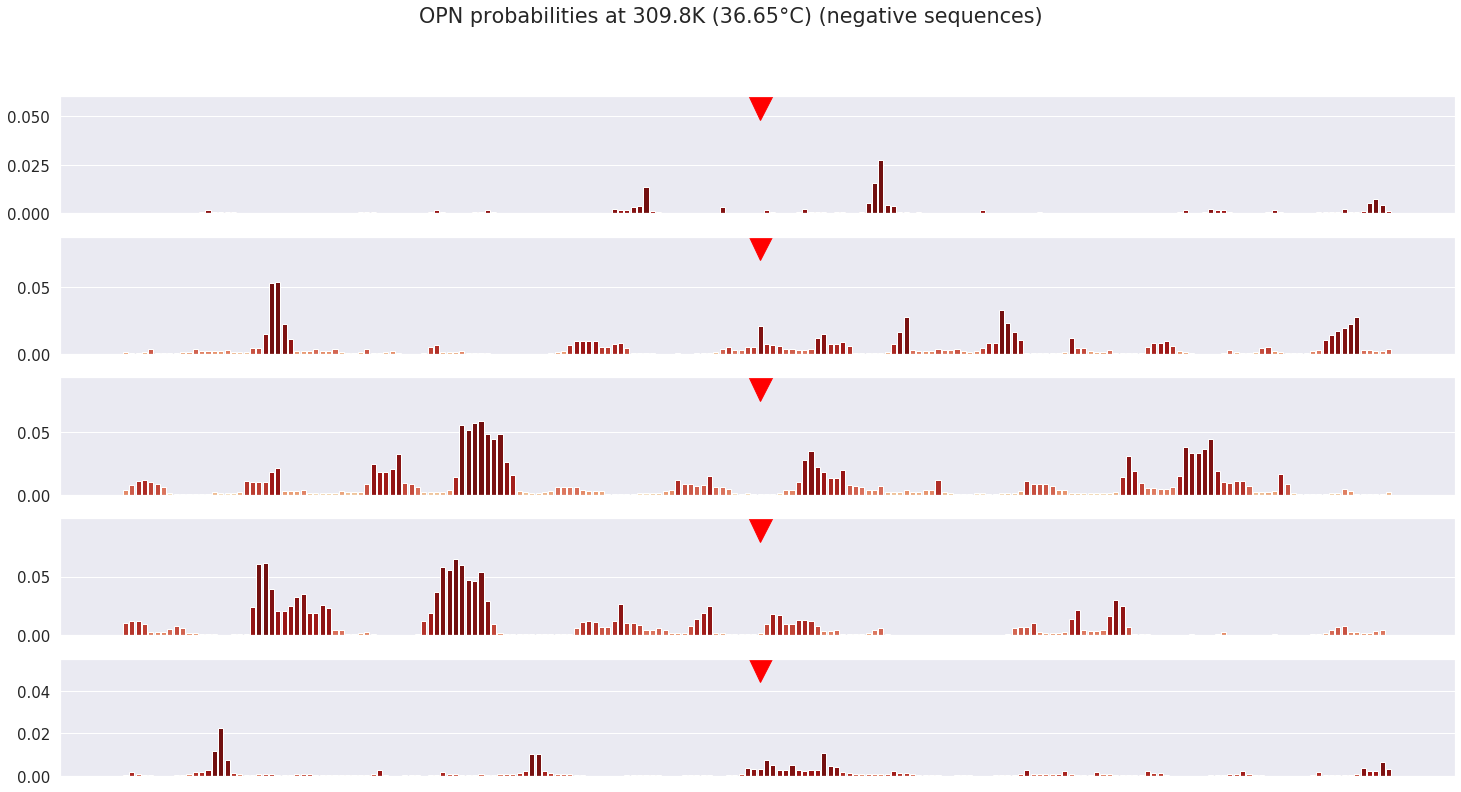

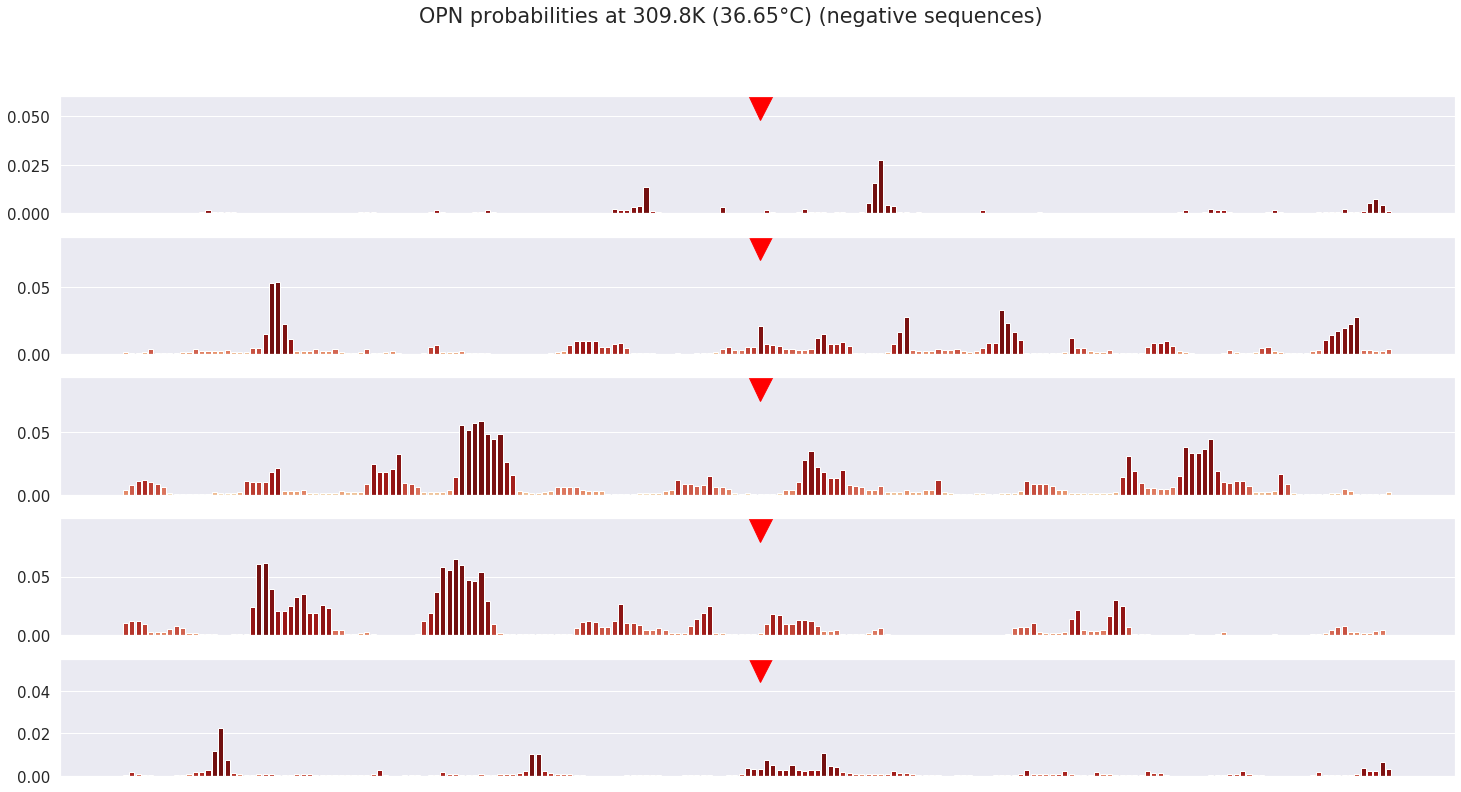

In [116]:
# 5 random seqs OPN neg
probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('OPN')]) for seqidx in selected_seqs]

plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-5randomNEGseqs-at309d8K.png', 'png')
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-5randomNEGseqs-at309d8K.pdf', 'pdf');

In [117]:
# 5 random seqs BUB8 neg
#probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('BUB8')]) for seqidx in selected_seqs]
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5randomNEGseqs-at309d8K.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5randomNEGseqs-at309d8K.pdf', 'pdf');

## Handpicked

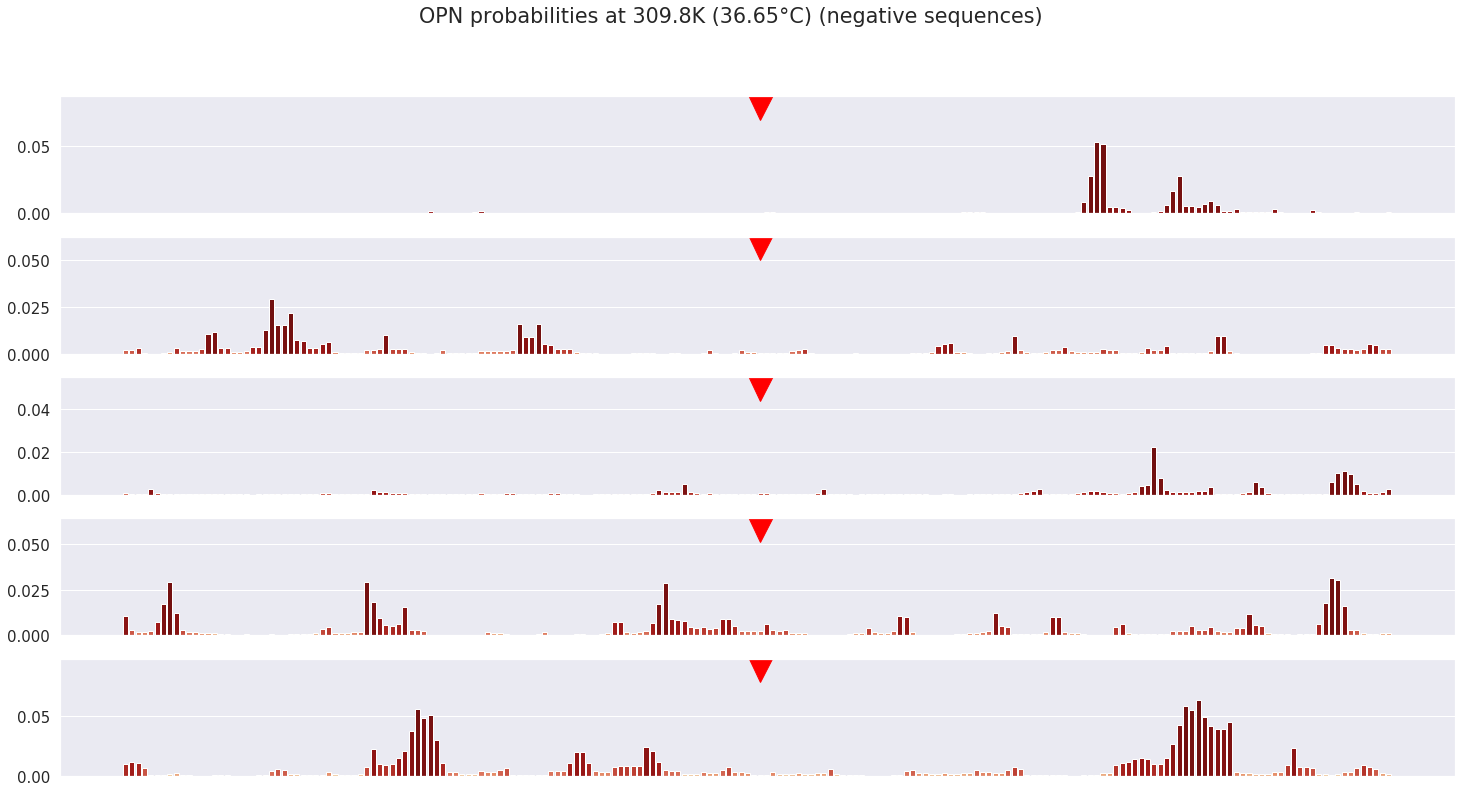

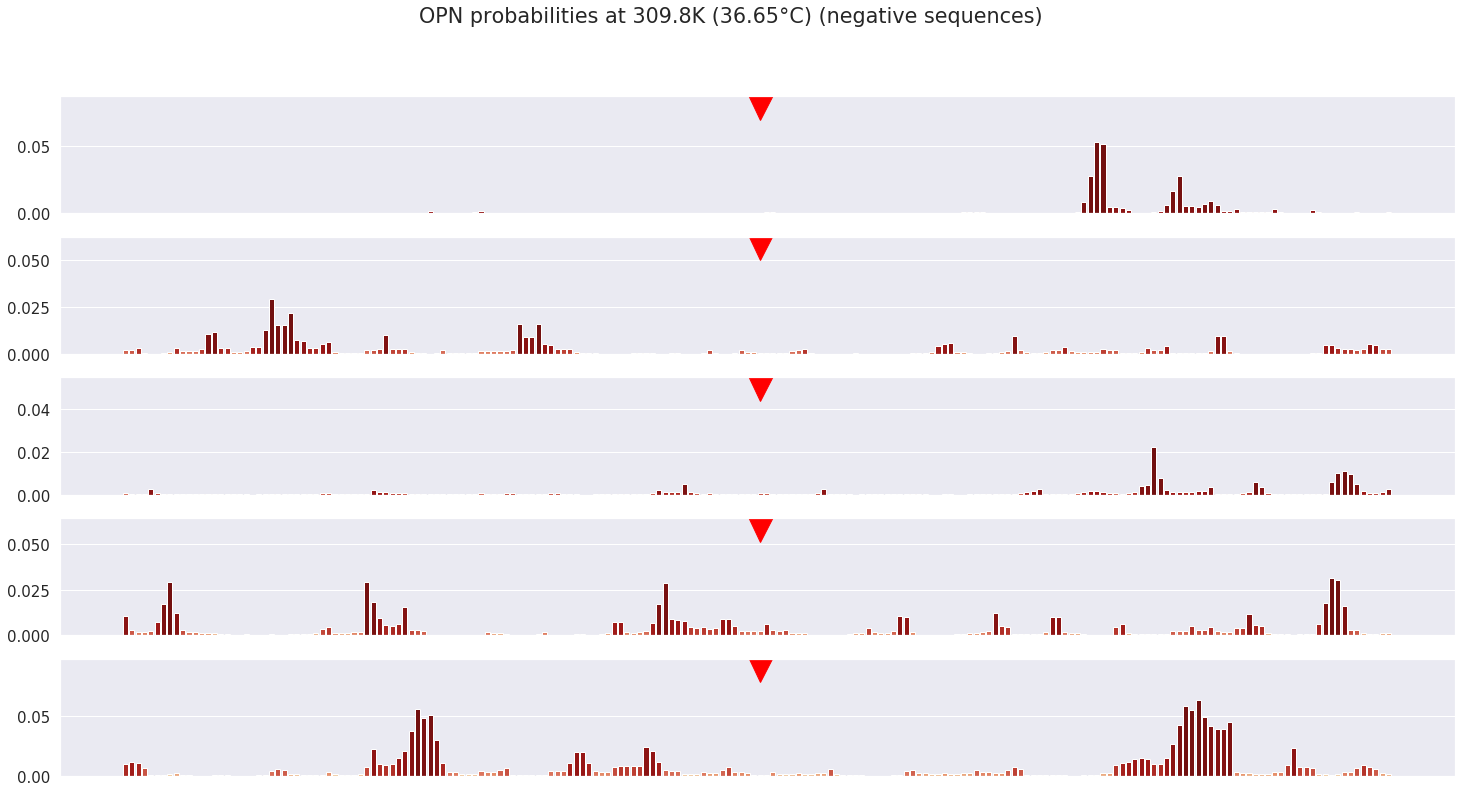

In [118]:
selected_seqs = handpicked_seqs = [-65, -404, -194, -14, -57]

# 5 handpicked seqs OPN neg
probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('OPN')]) for seqidx in selected_seqs]
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-5handpickedNEGseqs-at309d8K.png', 'png')
plot_base_prob_bars('OPN probabilities at 309.8K (36.65°C) (negative sequences) ', probs_list, 'OrRd', 'red', 'OPNprobs-5handpickedNEGseqs-at309d8K.pdf', 'pdf')

In [119]:
# 5 handpicked seqs BUB8 neg
#probs_list = [('', X_test[seqidx, temps.index(309.8), :, prob_types.index('BUB8')]) for seqidx in selected_seqs]
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5handpickedNEGseqs-at309d8K.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at 309.8K (36.65°C) (negative sequences)', probs_list, 'GnBu', 'red', 'BUB8probs-5handpickedNEGseqs-at309d8K.pdf', 'pdf')

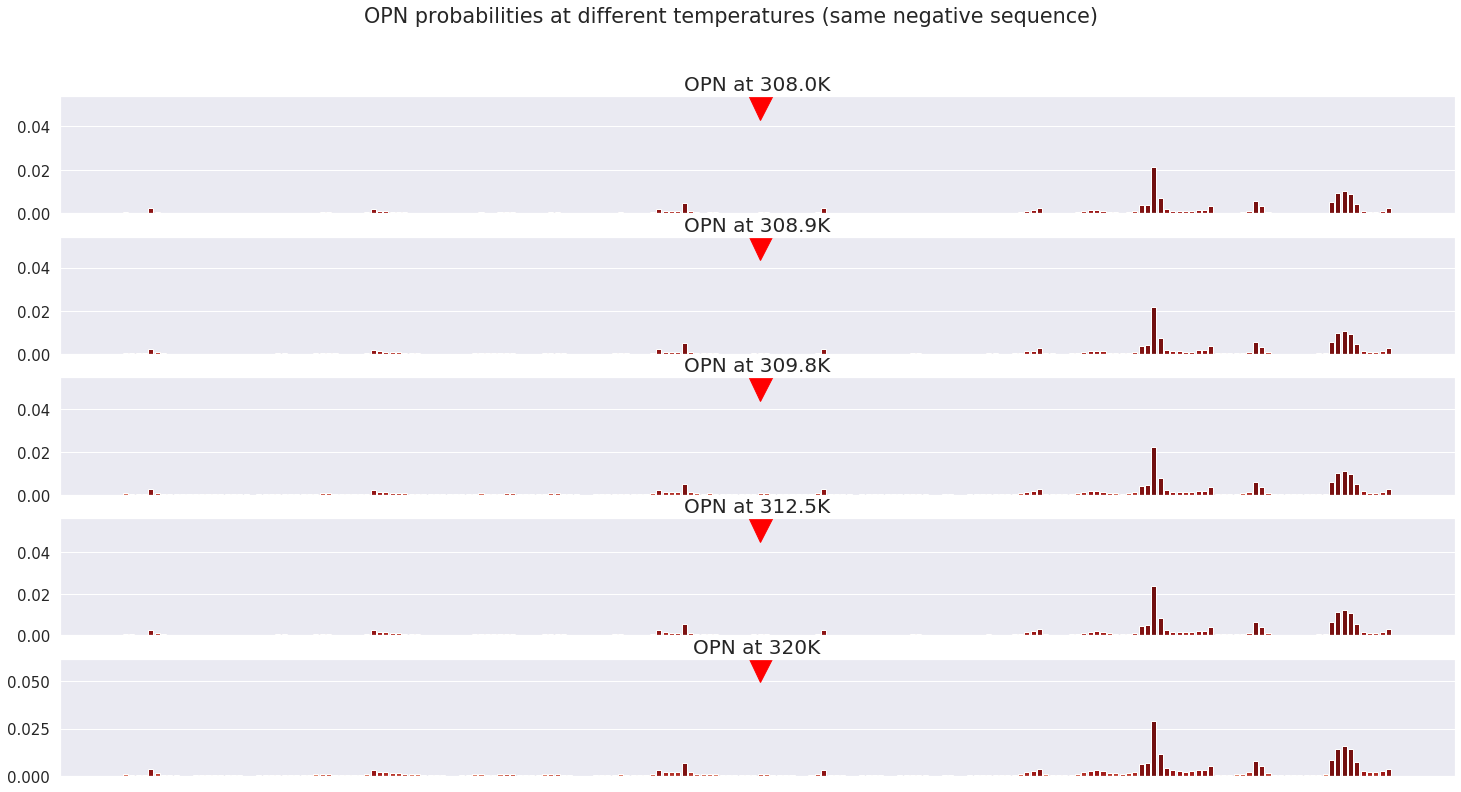

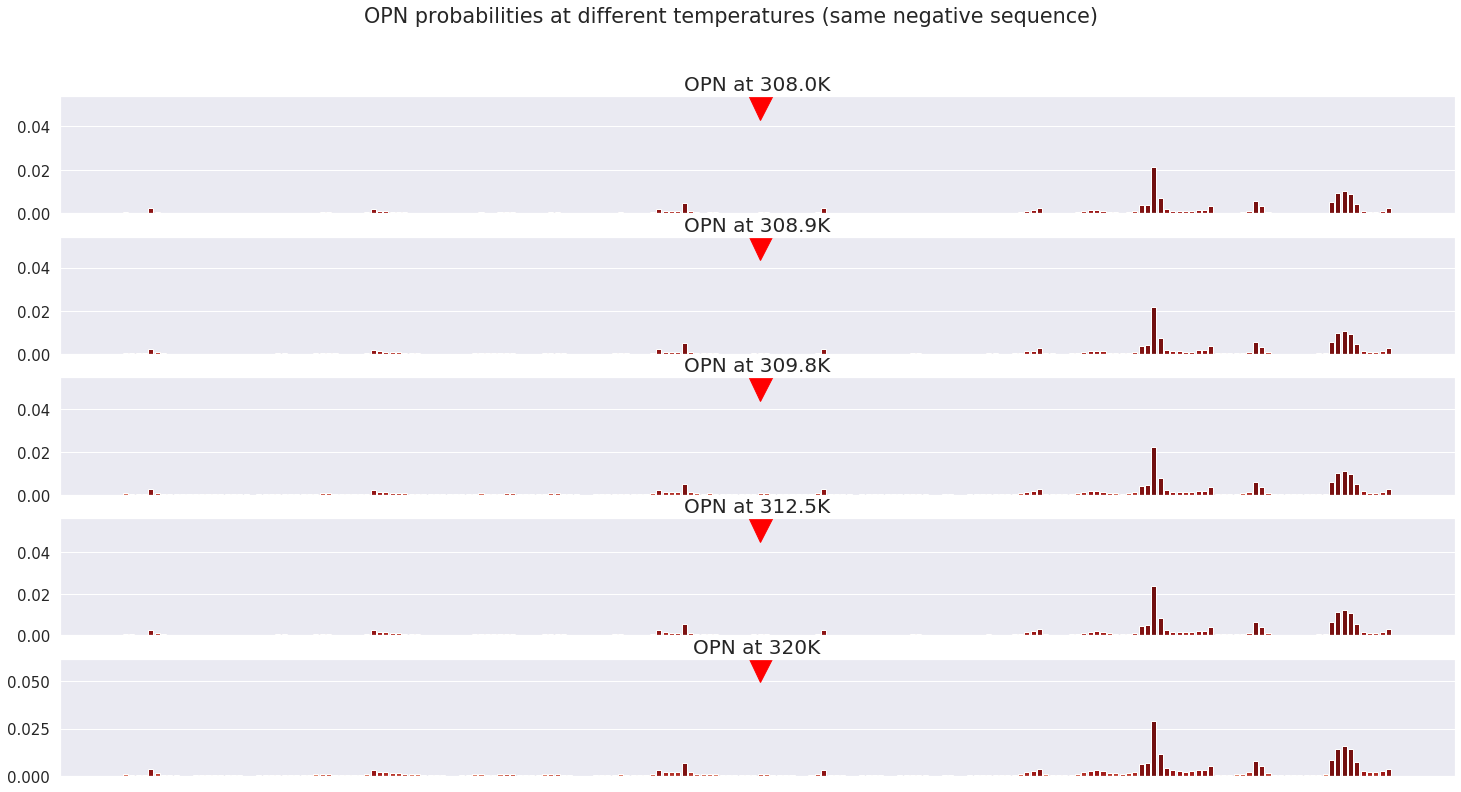

In [120]:
# 5 temps OPN neg
probs_list = [('OPN at '+str(temp)+'K', X_test[selected_seqs[2], temps.index(temp), :, prob_types.index('OPN')]) for temp in selected_temps]
plot_base_prob_bars('OPN probabilities at different temperatures (same negative sequence) ', probs_list, 'OrRd', 'red', 'OPNprobs-sameNEGseq-atdifferenttemps.png', 'png')
plot_base_prob_bars('OPN probabilities at different temperatures (same negative sequence) ', probs_list, 'OrRd', 'red', 'OPNprobs-sameNEGseq-atdifferenttemps.pdf', 'pdf')

Probabilidades OPN de la misma secuencia a diferentes temperaturas (pongo saltos grandes de temperatura para que los cambios sean algo más detectables).

In [121]:
# 5 temps BUB8 neg
#probs_list = [('BUB8 at '+str(temp)+'K', X_test[selected_seqs[2], temps.index(temp), :, prob_types.index('BUB8')]) for temp in selected_temps]
#plot_base_prob_bars('BUB8 probabilities at different temperatures (same negative sequence) ', probs_list, 'GnBu', 'red', 'BUB8probs-sameNEGseq-atdifferenttemps.png', 'png')
#plot_base_prob_bars('BUB8 probabilities at different temperatures (same negative sequence) ', probs_list, 'GnBu', 'red', 'BUB8probs-sameNEGseq-atdifferenttemps.pdf', 'pdf')

# Comparaciones positivo/negativo a diferentes temperaturas

In [7]:
selected_pos_seqs = [916, 1105, 1463]
selected_neg_seqs = [-65, -404, -194]
selected_temps = [310, 325, 340]

pos_probs_dict = {310: [X_test[seqidx, temps.index(310), :, prob_types.index('OPN')] for seqidx in selected_pos_seqs],
                  325: [X_test[seqidx, temps.index(325), :, prob_types.index('OPN')] for seqidx in selected_pos_seqs],
                  340: [X_test[seqidx, temps.index(340), :, prob_types.index('OPN')] for seqidx in selected_pos_seqs]}

neg_probs_dict = {310: [X_test[seqidx, temps.index(310), :, prob_types.index('OPN')] for seqidx in selected_neg_seqs],
                  325: [X_test[seqidx, temps.index(325), :, prob_types.index('OPN')] for seqidx in selected_neg_seqs],
                  340: [X_test[seqidx, temps.index(340), :, prob_types.index('OPN')] for seqidx in selected_neg_seqs]}


In [8]:
def get_max_4alltemps(probs_dict, seq_idx):
    
    maxs = []
    
    for key, value in probs_dict.items():
        maxs.append(value[seq_idx].max())
    
    return max(maxs)

In [50]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

In [67]:
def plot_comparative(selected_seqs, selected_temps, probs_dict, title, filename, palette, autoscale=True):
    sns.set(rc={'figure.figsize':(50,25)})
    
    ax_idx = 0
    
    # Structure
    fig, axes = plt.subplots(3, 3)
    fig.suptitle(title, fontsize=40)

    # Palette
    centercolor = 'red'

    for seq_idx in range(len(selected_seqs)):
            
        # Y axis scale:
        y_max = get_max_4alltemps(probs_dict, seq_idx)
        
        for temp_idx in range(len(selected_temps)):

            probs = probs_dict[selected_temps[temp_idx]][seq_idx]
            
            sns.barplot(ax=axes[seq_idx][temp_idx], 
                        x=np.arange(probs.shape[0]), 
                        y=probs, 
                        palette=np.array(palette[::1])[probs.argsort().argsort()],
                        linewidth=0)

            
            axes[seq_idx][temp_idx].set_title(f'Seq {seq_idx+1} at {selected_temps[temp_idx]}K', fontsize=30)
            axes[seq_idx][temp_idx].set(xticklabels=[]);
            axes[seq_idx][temp_idx].yaxis.set_tick_params(labelsize=30)
            if autoscale:
                y_max = probs.max()
            axes[seq_idx][temp_idx].plot([100], [y_max+0.03], marker='v', markersize=35, color=centercolor)
            
            change_width(axes[seq_idx][temp_idx], 1)

    fig.savefig(f'{filename}.png', format='png')
    fig.savefig(f'{filename}.pdf', format='pdf');

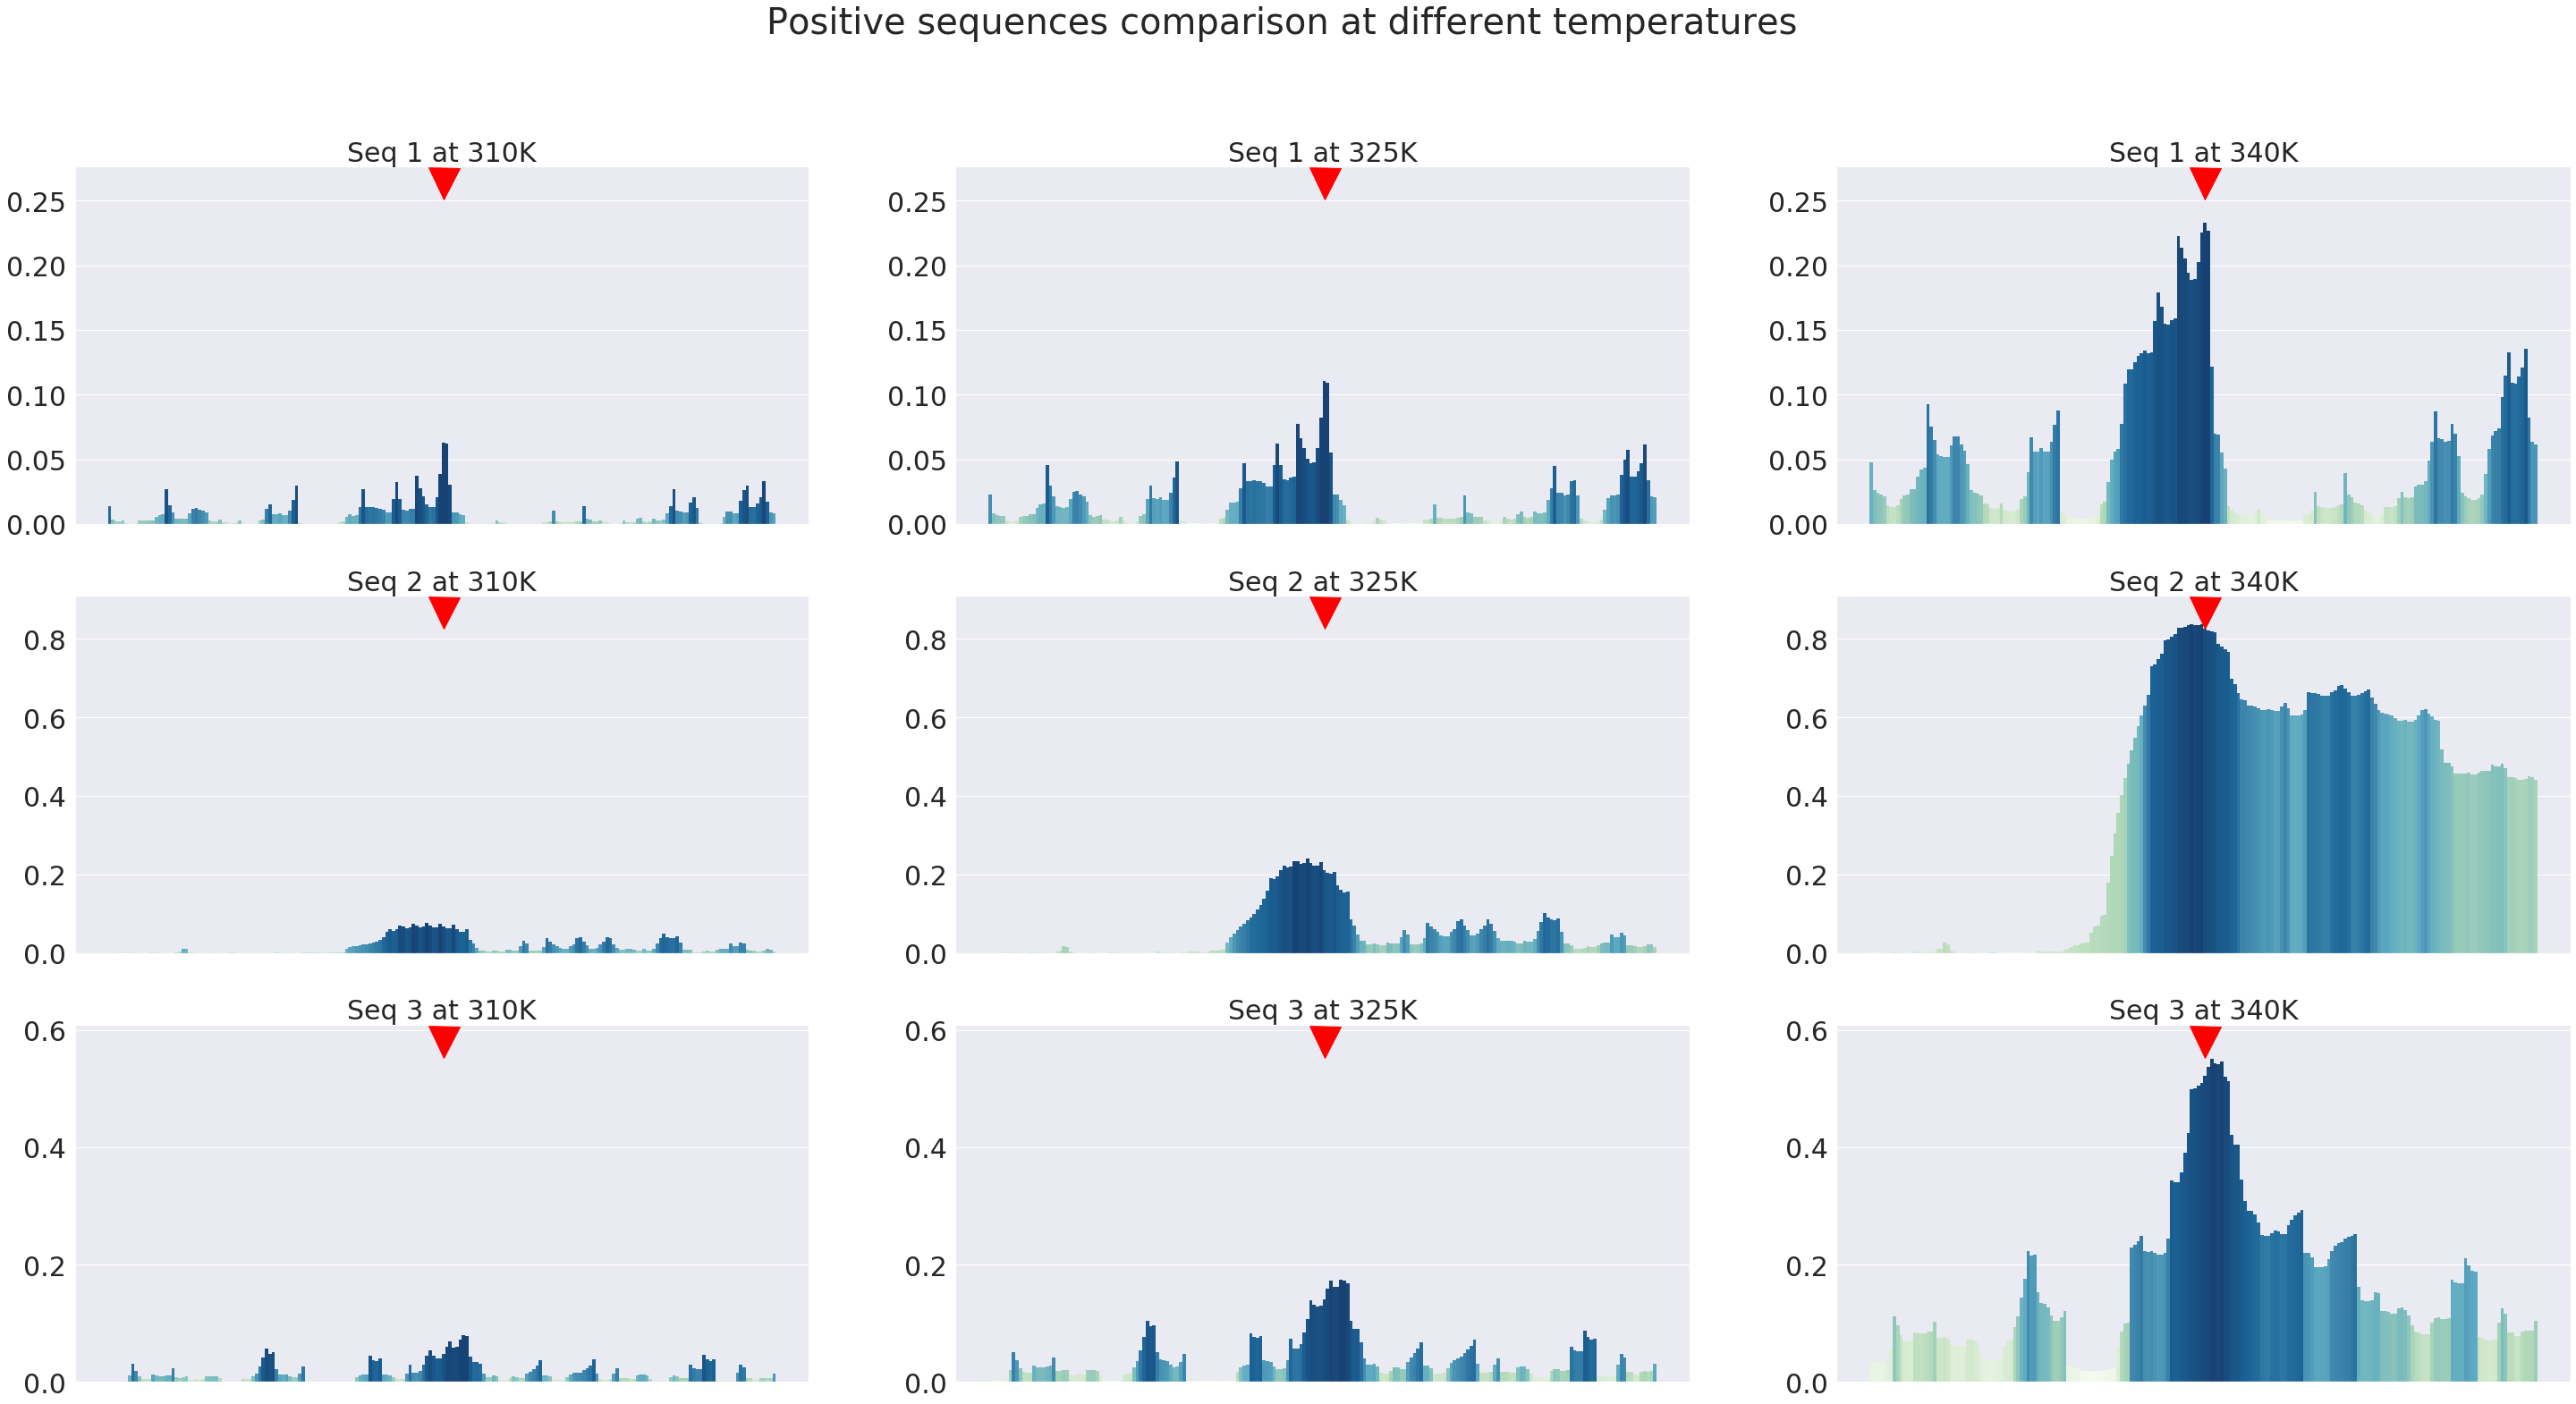

In [68]:
plot_comparative(selected_pos_seqs, selected_temps, pos_probs_dict, 'Positive sequences comparison at different temperatures', 'OPN_POS_comparison_same_scale', sns.color_palette('GnBu', len(pos_probs_dict[310][0])), autoscale=False)

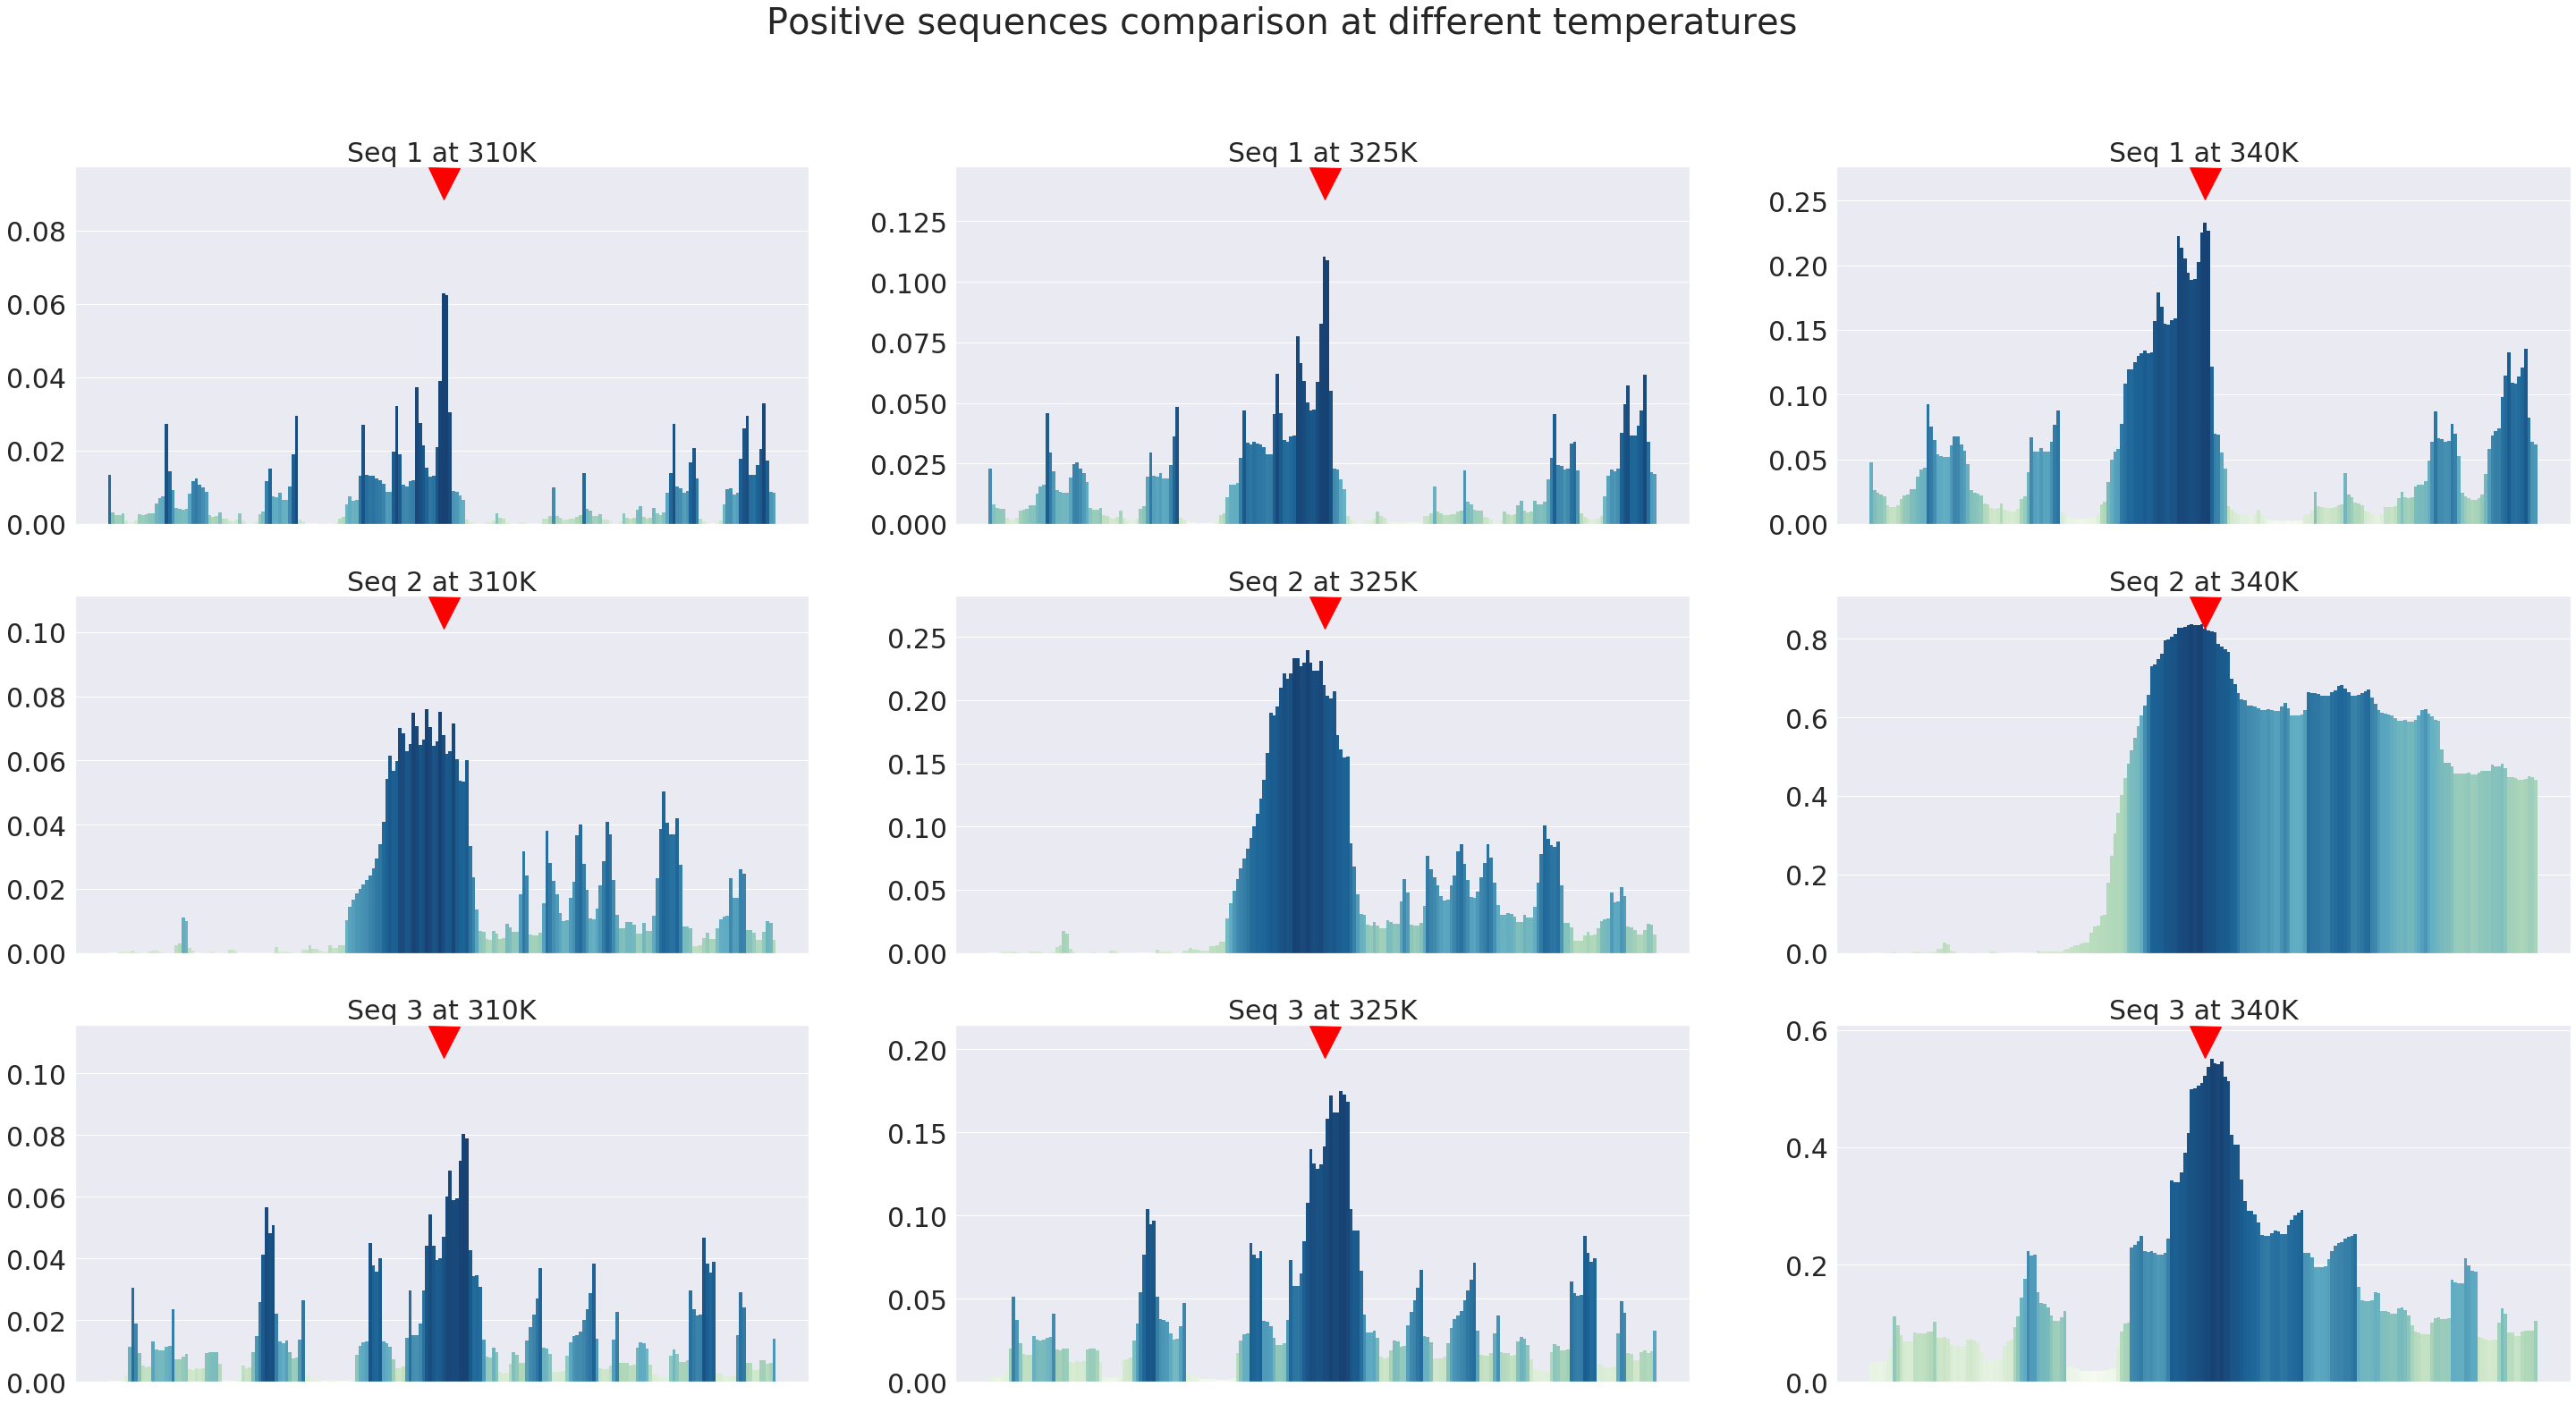

In [69]:
plot_comparative(selected_pos_seqs, selected_temps, pos_probs_dict, 'Positive sequences comparison at different temperatures', 'OPN_POS_comparison_autoscale', sns.color_palette('GnBu', len(pos_probs_dict[310][0])), autoscale=True)

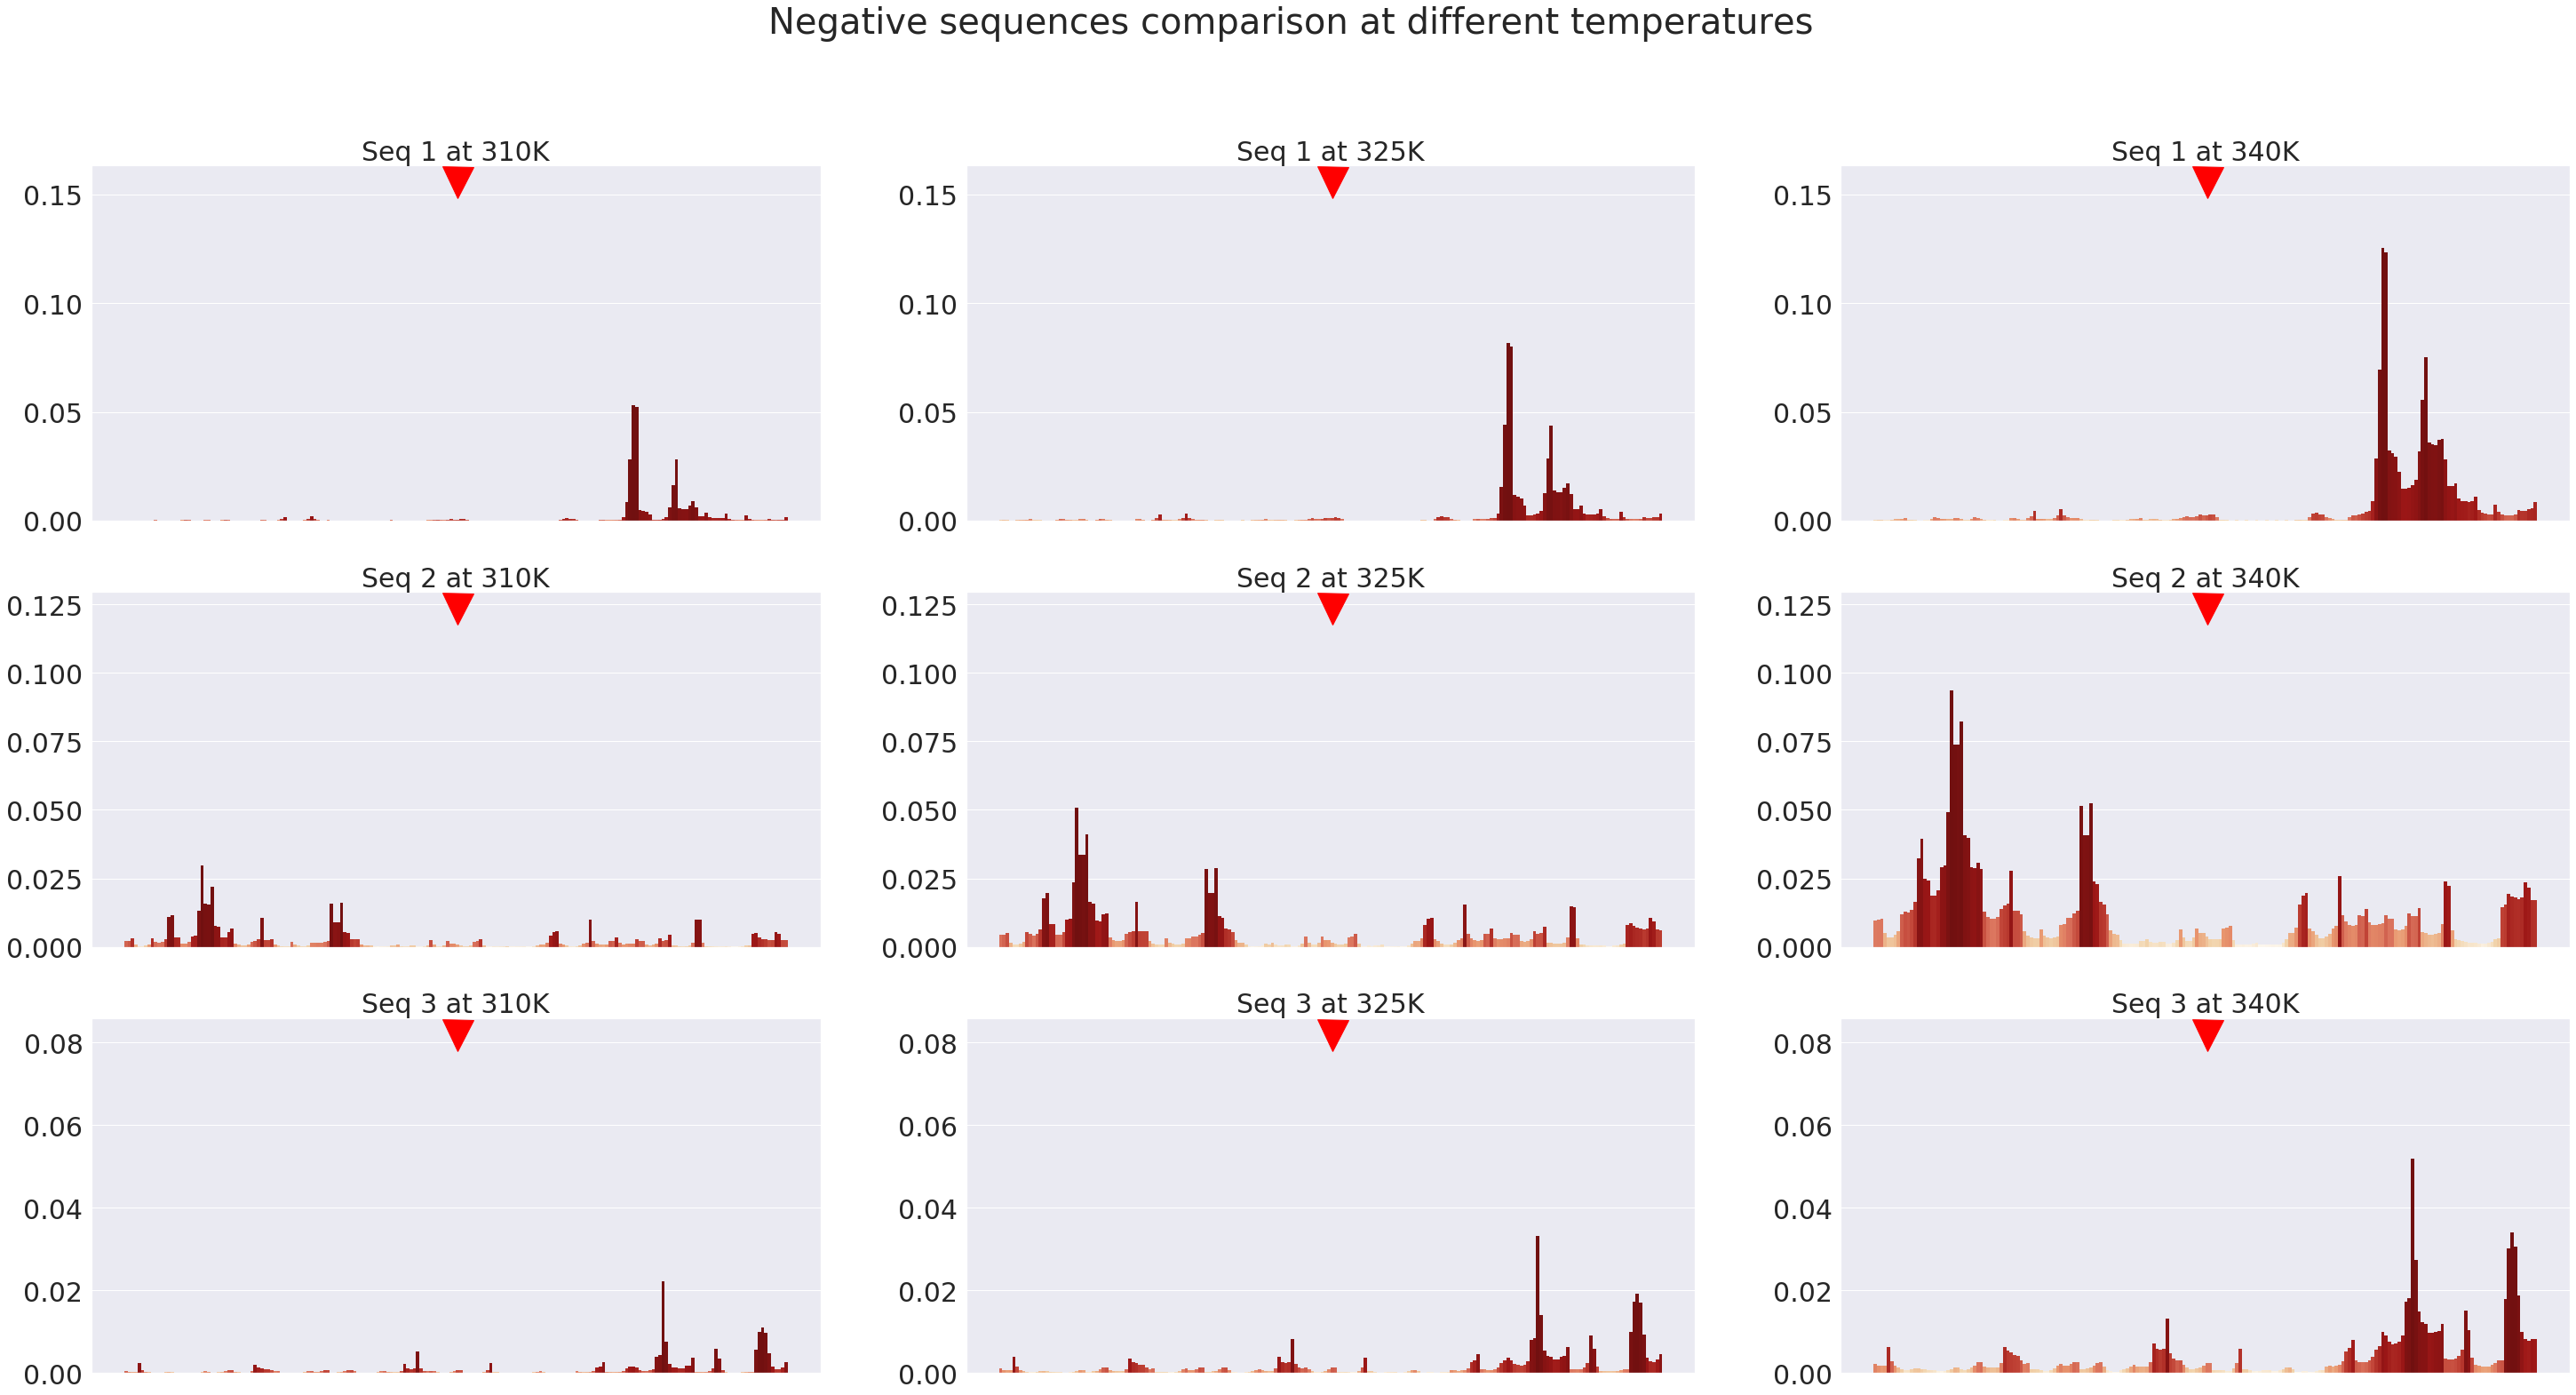

In [70]:
plot_comparative(selected_neg_seqs, selected_temps, neg_probs_dict, 'Negative sequences comparison at different temperatures', 'OPN_NEG_comparison_same_scale', sns.color_palette('OrRd', len(neg_probs_dict[310][0])), autoscale=False)

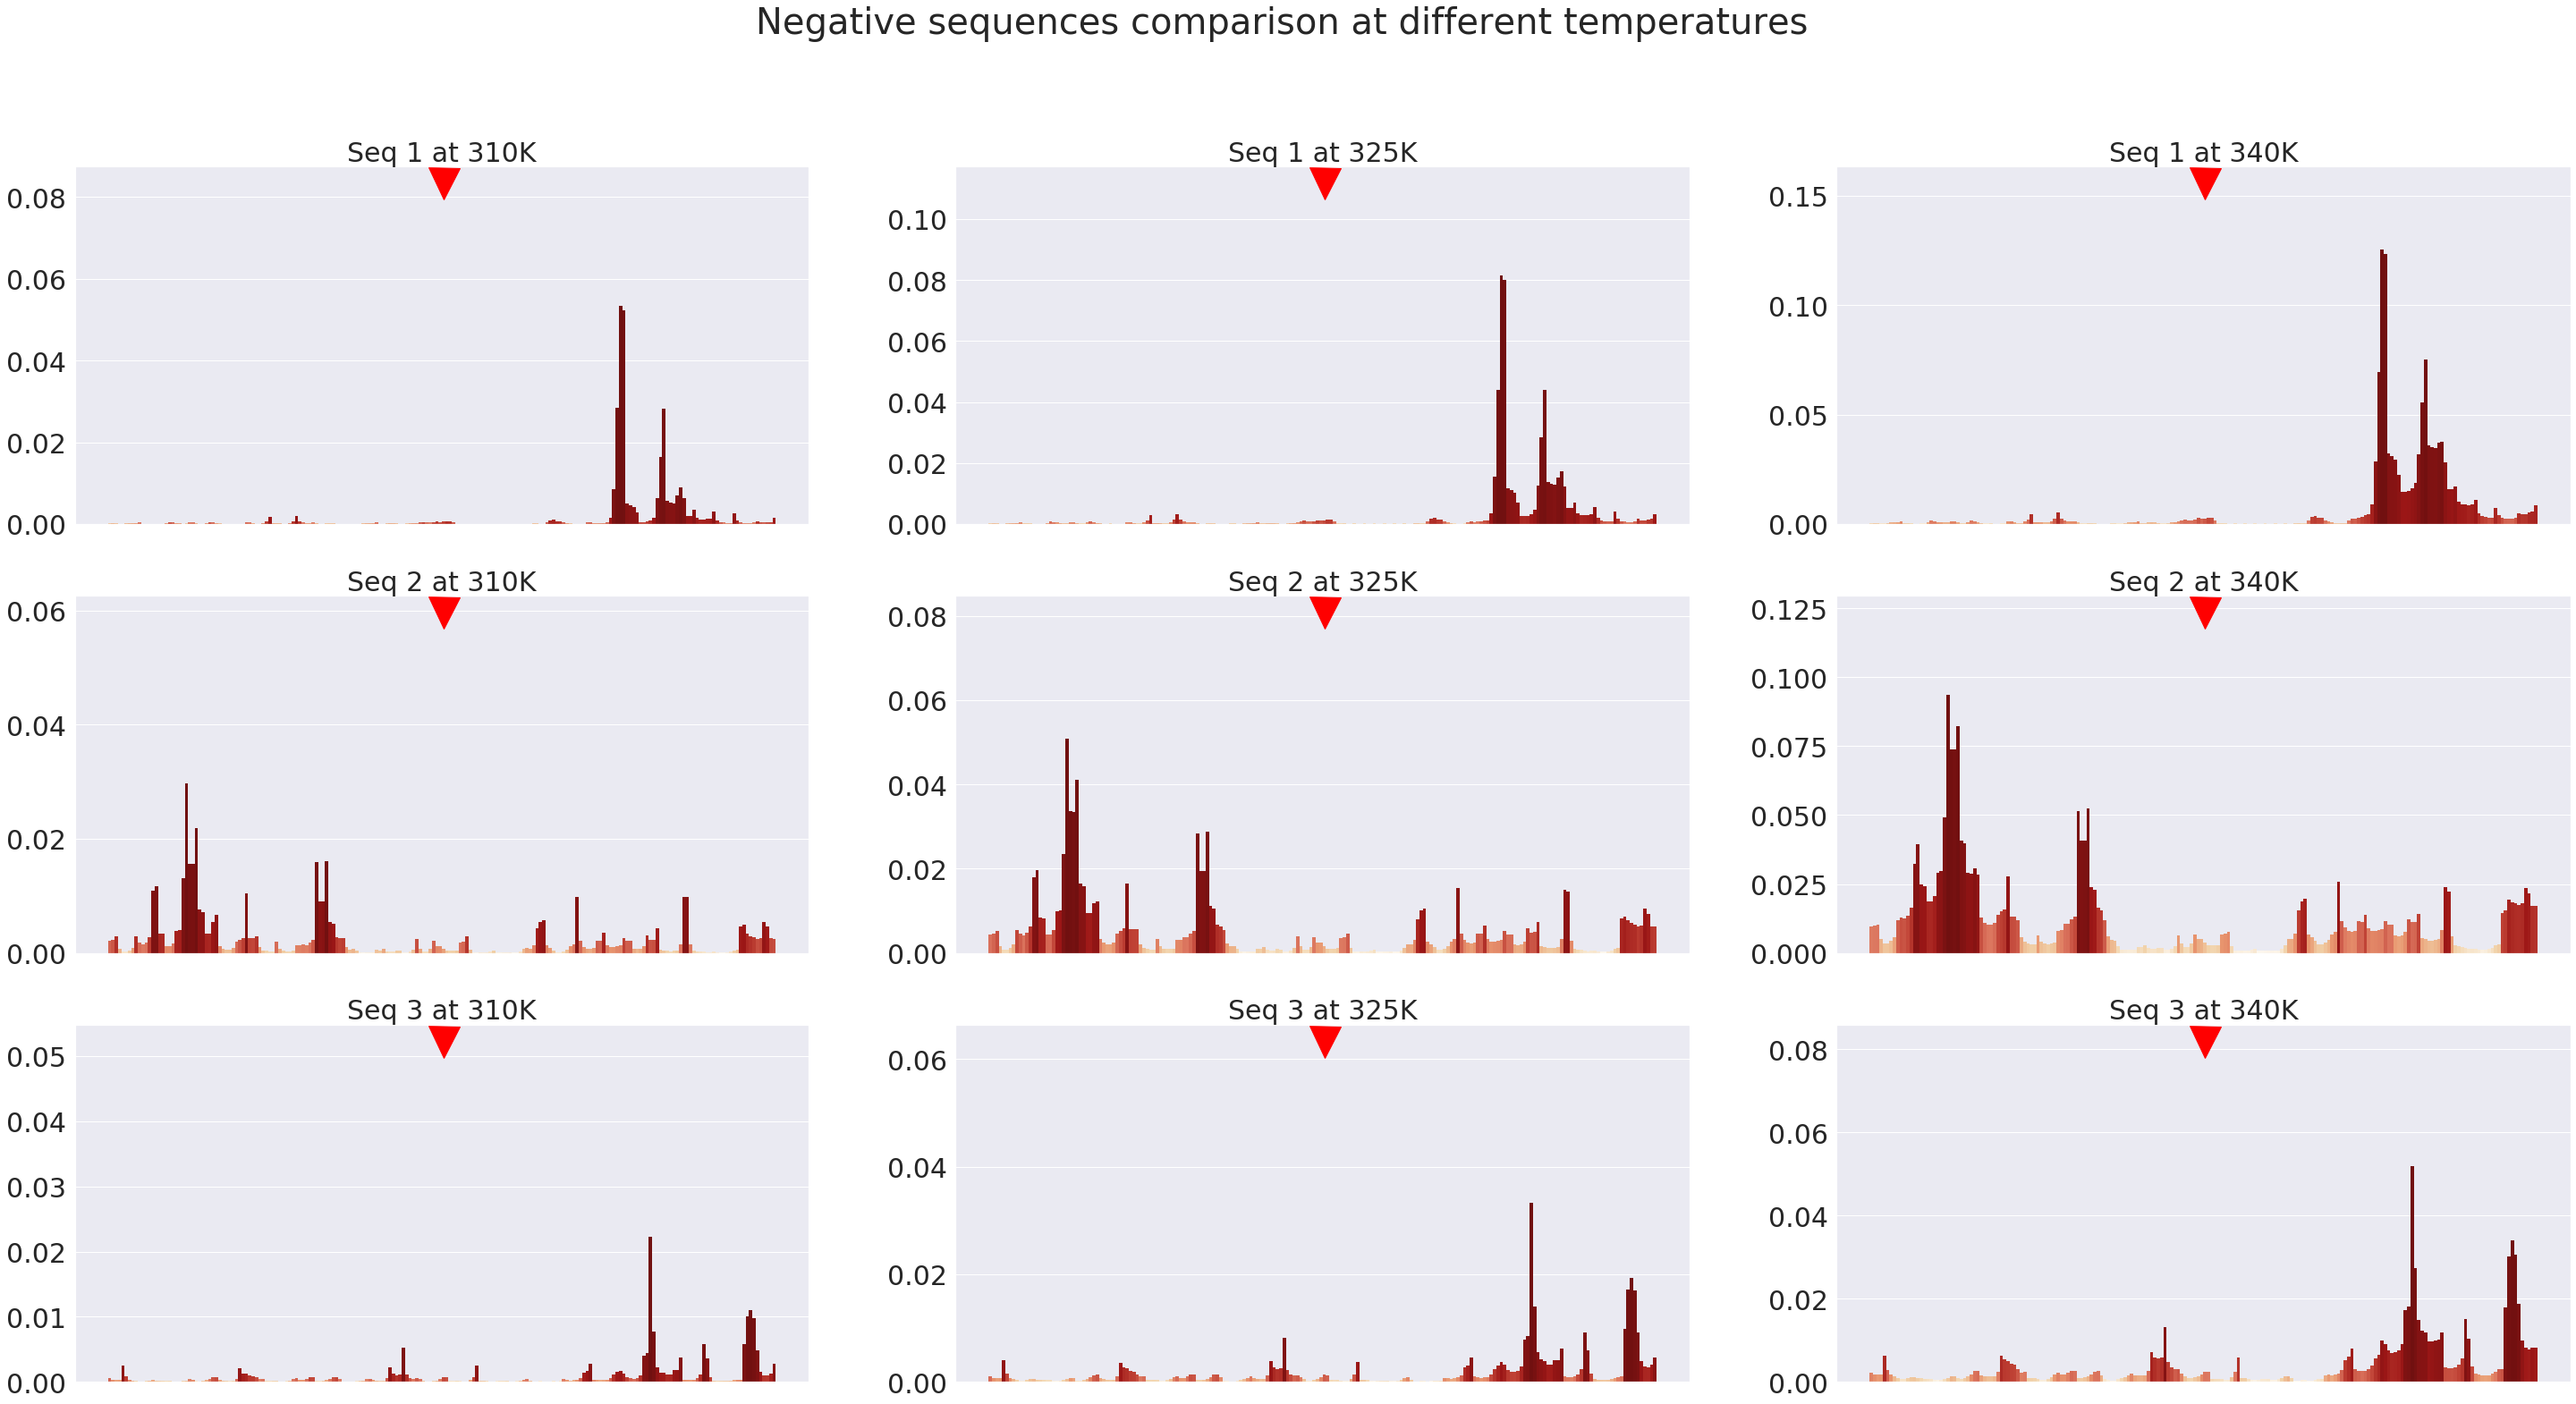

In [71]:
plot_comparative(selected_neg_seqs, selected_temps, neg_probs_dict, 'Negative sequences comparison at different temperatures', 'OPN_NEG_comparison_autoscale', sns.color_palette('OrRd', len(neg_probs_dict[310][0])), autoscale=True)